In [6]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import bootstrap


In [7]:
filename = "crop_inside_250509_U2OS-53BP1Halo_50nM_cell21_10ms_0irra_traces.csv"

In [8]:
df = pd.read_csv(filename)
df

,traj_idx,frame,x,y,z
0,0,384,84.722572,105.668258,0.0
1,0,385,84.972286,105.948276,0.0
2,10,452,84.141376,102.167063,0.0
3,10,453,83.118758,102.881920,0.0
4,24,170,89.474862,104.540650,0.0
...,...,...,...,...,...
575,511,1125,84.638002,105.319834,0.0
576,512,148,92.046531,102.057087,0.0
577,512,149,92.707360,101.086991,0.0
578,512,150,91.917468,101.689032,0.0


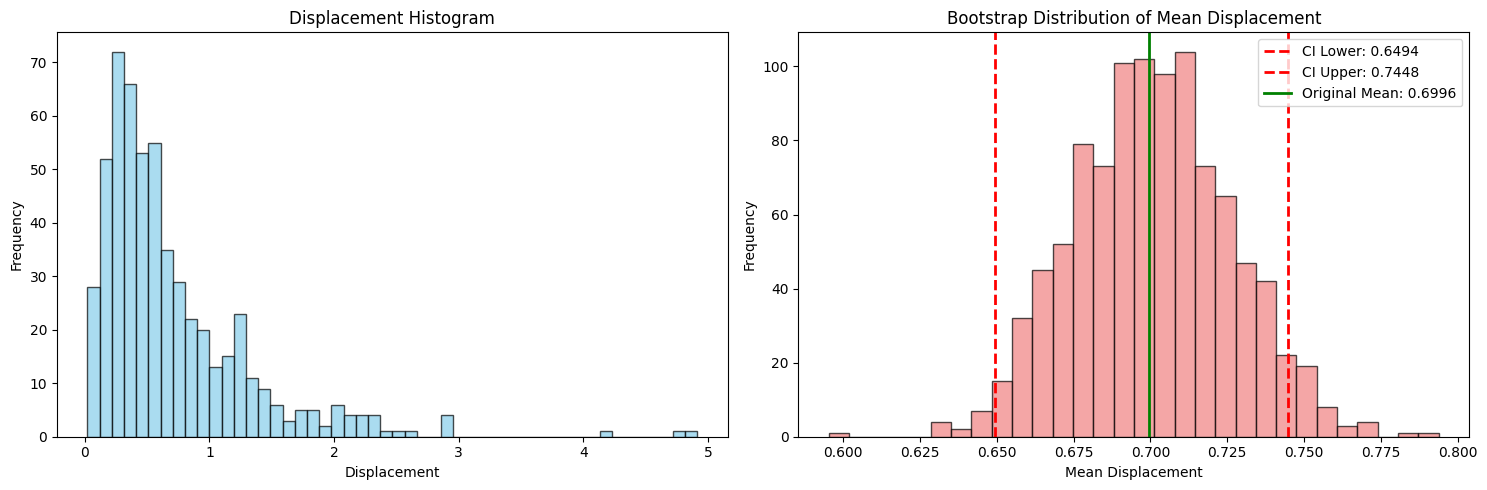

Original mean displacement: 0.699561
Bootstrap mean: 0.700549
95% Confidence Interval: [0.649434, 0.744780]
Bootstrap standard error: 0.025580


In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import bootstrap

# Assuming df is already loaded
# Step 1: Sort to ensure displacements are computed in order
df_sorted = df.sort_values(by=["traj_idx", "frame"])

# Step 2: Compute displacements
displacements = []
for traj_id, group in df_sorted.groupby("traj_idx"):
    group = group.sort_values("frame")
    coords = group[["x", "y"]].values
    if len(coords) > 1:
        diffs = np.diff(coords, axis=0)
        dists = np.linalg.norm(diffs, axis=1)
        displacements.extend(dists)

displacements = np.array(displacements)

# Step 3: Bootstrap mean with 1000 resamples
res = bootstrap((displacements,), np.mean, confidence_level=0.95, n_resamples=1000, method='basic')

# Step 4: Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot original displacement histogram
ax1.hist(displacements, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_title("Displacement Histogram")
ax1.set_xlabel("Displacement")
ax1.set_ylabel("Frequency")

# Plot bootstrap results histogram
ax2.hist(res.bootstrap_distribution, bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
ax2.set_title("Bootstrap Distribution of Mean Displacement")
ax2.set_xlabel("Mean Displacement")
ax2.set_ylabel("Frequency")

# Add vertical lines for confidence interval
ax2.axvline(res.confidence_interval.low, color='red', linestyle='--', linewidth=2, label=f'CI Lower: {res.confidence_interval.low:.4f}')
ax2.axvline(res.confidence_interval.high, color='red', linestyle='--', linewidth=2, label=f'CI Upper: {res.confidence_interval.high:.4f}')
ax2.axvline(np.mean(displacements), color='green', linestyle='-', linewidth=2, label=f'Original Mean: {np.mean(displacements):.4f}')
ax2.legend()

plt.tight_layout()
plt.show()

# Print bootstrap results
print(f"Original mean displacement: {np.mean(displacements):.6f}")
print(f"Bootstrap mean: {np.mean(res.bootstrap_distribution):.6f}")
print(f"95% Confidence Interval: [{res.confidence_interval.low:.6f}, {res.confidence_interval.high:.6f}]")
print(f"Bootstrap standard error: {np.std(res.bootstrap_distribution):.6f}")